**Описание датасета:**

**Предметная область** - Ботаника и классификация растений

**Источник данных** - [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris)

**Характер данных** - Реальные данные, собранные в ходе научных расследований

**Описание атрибутов**

sepal **[Categorical]** - Чашелистик

sepal_Length **[Float]** - Длина чашелистика

sepal_Width **[Float]** - Ширина чашелистика

petal **[Categorical]** - Лепесток

petal_Length **[Float]** - Длина лепестка

petal_Width **[Float]** - Ширина лепестка

species **[Object]** - Виды растений

setosa **[Categorical]** - Ирис

versicolor **[Categorical]** - Разноцветный ирис

virginica **[Categorical]** - Ирис вингирский



**Описание задачи анализа** - Определение вида ириса на основе морфологических измерений цветка

**Ход работы №1**

**Импорт библиотек и настройка отображения графиков**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('seaborn-v0_8') # default ggplot
plt.rcParams['figure.figsize'] = (10, 6)

**Загрузка датасета**

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


**Расчет среднего значения и СКО основных атрибутов**

In [3]:
def analyzeFeature(df, column):
    print(f"{column}")
    print(f"Среднее значение: {df[column].mean():.4f}")
    print(f"СКО: {df[column].std():.4f}")
    print()

numericColumns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
for col in numericColumns:
    analyzeFeature(iris_df, col)

sepal length (cm)
Среднее значение: 5.8433
СКО: 0.8281

sepal width (cm)
Среднее значение: 3.0573
СКО: 0.4359

petal length (cm)
Среднее значение: 3.7580
СКО: 1.7653

petal width (cm)
Среднее значение: 1.1993
СКО: 0.7622



**Гистограммы распределения**

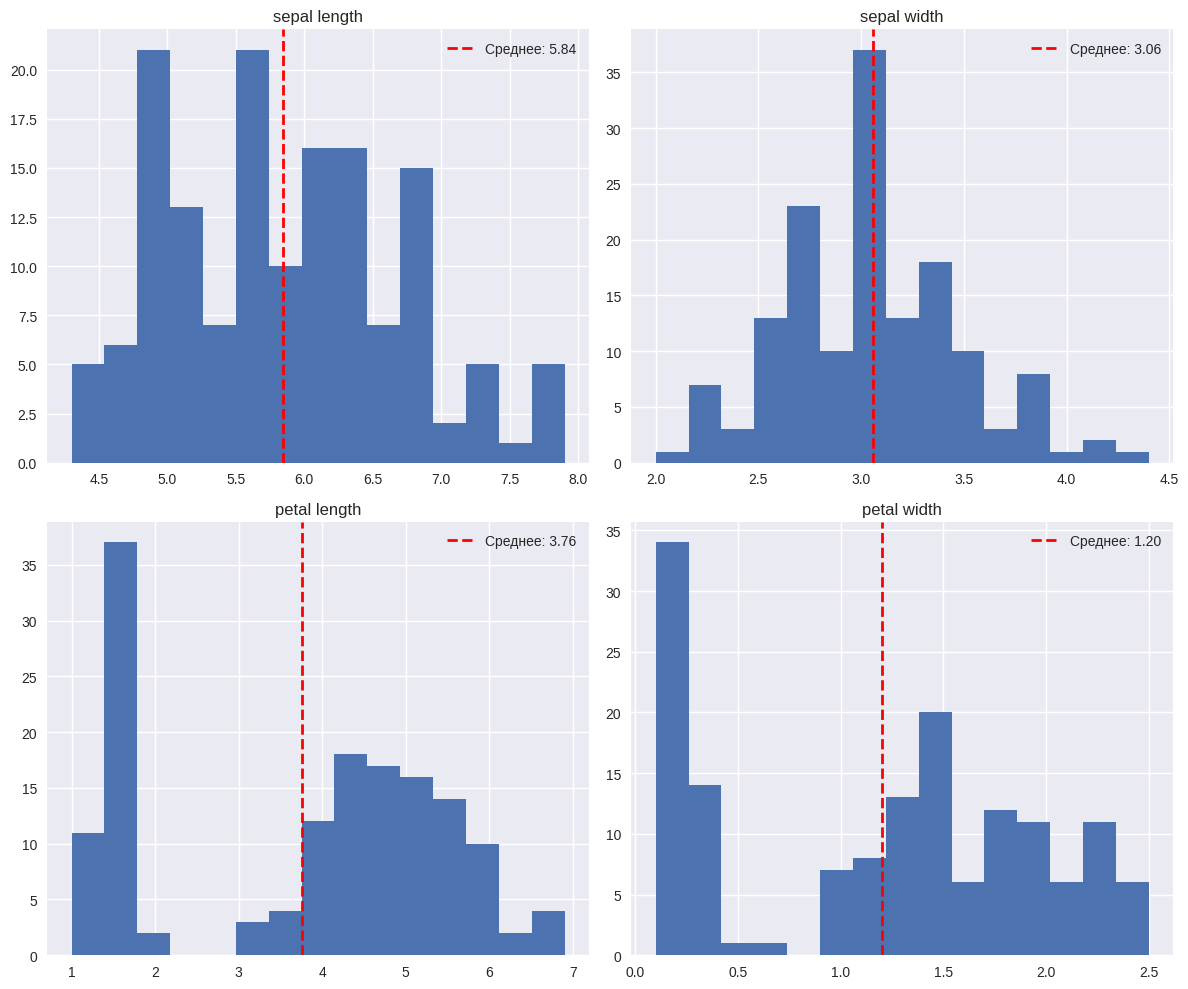

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

iris_df[numericColumns].hist(ax=axes, bins=15)

for i, col in enumerate(numericColumns):
    row = i // 2
    col_idx = i % 2
    mean_value = iris_df[col].mean()

    axes[row, col_idx].axvline(mean_value, color = 'red', linestyle = '--', linewidth =2 , label = f'Среднее: {mean_value:.2f}')
    axes[row, col_idx].legend()

axes[0, 0].set_title('sepal length')
axes[0, 1].set_title('sepal width')
axes[1, 0].set_title('petal length')
axes[1, 1].set_title('petal width')

plt.tight_layout()
plt.show()

**Анализ выборов, используя IQR**

In [5]:
def analyzeOutliers(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lowerBound) | (df[column] > upperBound)]
    outliersCount = len(outliers)

    print(f"\n{column}")
    print(f"Q1 - {Q1:.4f}")
    print(f"Q3 - {Q3:.4f}")
    print(f"IQR - {IQR:.4f}")
    print(f"Нижняя граница - {lowerBound:.4f}")
    print(f"Верхняя граница - {upperBound:.4f}")
    print(f"Общее количество выбросов - {outliersCount}")
    if outliersCount > 0:
        print(f"Значения выбросов - {outliers[column].values}")
    return lowerBound, upperBound, outliers

outliersDf = {}
for col in numericColumns:
    lower, upper, outliers = analyzeOutliers(iris_df, col)
    outliersDf[col] = {
        'lowerBound': lower,
        'upperBound': upper,
        'outliers': outliers
    }


sepal length (cm)
Q1 - 5.1000
Q3 - 6.4000
IQR - 1.3000
Нижняя граница - 3.1500
Верхняя граница - 8.3500
Общее количество выбросов - 0

sepal width (cm)
Q1 - 2.8000
Q3 - 3.3000
IQR - 0.5000
Нижняя граница - 2.0500
Верхняя граница - 4.0500
Общее количество выбросов - 4
Значения выбросов - [4.4 4.1 4.2 2. ]

petal length (cm)
Q1 - 1.6000
Q3 - 5.1000
IQR - 3.5000
Нижняя граница - -3.6500
Верхняя граница - 10.3500
Общее количество выбросов - 0

petal width (cm)
Q1 - 0.3000
Q3 - 1.8000
IQR - 1.5000
Нижняя граница - -1.9500
Верхняя граница - 4.0500
Общее количество выбросов - 0


**Анализ пропущенных значений**

In [6]:
missingData = iris_df.isnull().sum()
totalMissing = missingData.sum()
total = np.prod(iris_df.shape)
missingPercentage = (totalMissing / total) * 100

print(f"Общее количество пропущенных значений: {totalMissing}")
print(f"Процент пропущенных значений: {missingPercentage:.2f}%")
print()
for col in iris_df.columns:
    missingCount = iris_df[col].isnull().sum()
    missingPercent = (missingCount / len(iris_df)) * 100
    print(f"{col}: {missingCount} пропусков ({missingPercent:.1f}%)")

Общее количество пропущенных значений: 0
Процент пропущенных значений: 0.00%

sepal length (cm): 0 пропусков (0.0%)
sepal width (cm): 0 пропусков (0.0%)
petal length (cm): 0 пропусков (0.0%)
petal width (cm): 0 пропусков (0.0%)
species: 0 пропусков (0.0%)


**Вариант обработки пропущенных значений**

Если пропусков **меньше** **5%** - Замена средним - медианой для числовых значений

Если пропусков **от** **5% до 15%** - Замена предсказанными значениями с помощью регрессионных моделей, создание множественной импутации MICE

Если пропусков **от 15% до 30%** - Провести анализ механизма пропусков, создать индикатор переменных, провести условные методы импутации

Если пропусков **свыше 30%** - Использовать алгоритмы, устойчивые к пропускам, провести удаление признака, создать отдельную модель

**Определение корреляции (матрица корреляций)**

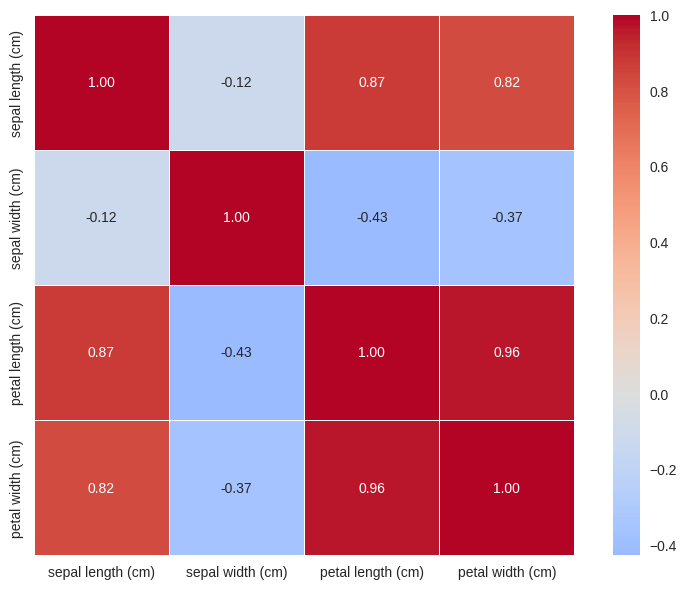

In [7]:
correlationMatrix = iris_df[numericColumns].corr()
plt.figure(figsize = (8, 6))
sns.heatmap(correlationMatrix, annot = True, cmap = 'coolwarm', center = 0, square = True, linewidths = 0.5, fmt = '.2f')
plt.tight_layout()
plt.show()

**Поиск высококоррелированных пар признаков**

In [8]:
highPairs = []
strongPairs = []
moderatePairs = []

for i in range(len(correlationMatrix.columns)):
    for j in range(i + 1, len(correlationMatrix.columns)):
        corrValue = correlationMatrix.iloc[i, j]
        feature1 = correlationMatrix.columns[i]
        feature2 = correlationMatrix.columns[j]

        if abs(corrValue) >= 0.7:
            highPairs.append((feature1, feature2, corrValue))
            if abs(corrValue) >= 0.9:
                strongPairs.append((feature1, feature2, corrValue))
            else:
                moderatePairs.append((feature1, feature2, corrValue))

if strongPairs:
    for pair in strongPairs:
        correlationType = "Положительная" if pair[2] > 0 else "Отрицательная"
        strength = "Очень сильная"
        print(f"{pair[0]} и {pair[1]}")
        print(f"{pair[2]:.4f}")
        print(f"{correlationType}")
        print(f"{strength}")
        print()
else:
    print("Нет пар с очень сильной корреляцией")

if moderatePairs:
    for pair in moderatePairs:
        correlationType = "Положительная" if pair[2] > 0 else "Отрицательная"
        strength = "Сильная"
        print(f"{pair[0]} и {pair[1]}")
        print(f"{pair[2]:.4f}")
        print(f"{correlationType}")
        print(f"{strength}")
        print()
else:
    print("Нет пар с сильной корреляцией")

petal length (cm) и petal width (cm)
0.9629
Положительная
Очень сильная

sepal length (cm) и petal length (cm)
0.8718
Положительная
Сильная

sepal length (cm) и petal width (cm)
0.8179
Положительная
Сильная



**Поиск низкокоррелированных пар признаков**

In [9]:
noCorrelationPairs = []
WeakPairs = []

for i in range(len(correlationMatrix.columns)):
    for j in range(i + 1, len(correlationMatrix.columns)):
        corrValue = correlationMatrix.iloc[i, j]
        feature1 = correlationMatrix.columns[i]
        feature2 = correlationMatrix.columns[j]

        if abs(corrValue) < 0.1:
            noCorrelationPairs.append((feature1, feature2, corrValue))
        elif abs(corrValue) < 0.3:
            WeakPairs.append((feature1, feature2, corrValue))

if noCorrelationPairs:
    for pair in noCorrelationPairs:
        print(f"{pair[0]} и {pair[1]}")
        print(f"{pair[2]:.4f}")
        print(f"Корреляция почти отсутствует")
        print(f"Незначимая")
        print()
else:
    print("Нет пар без корреляции")

Нет пар без корреляции


**Матрица графиков рассеивания**

<Figure size 1200x1000 with 0 Axes>

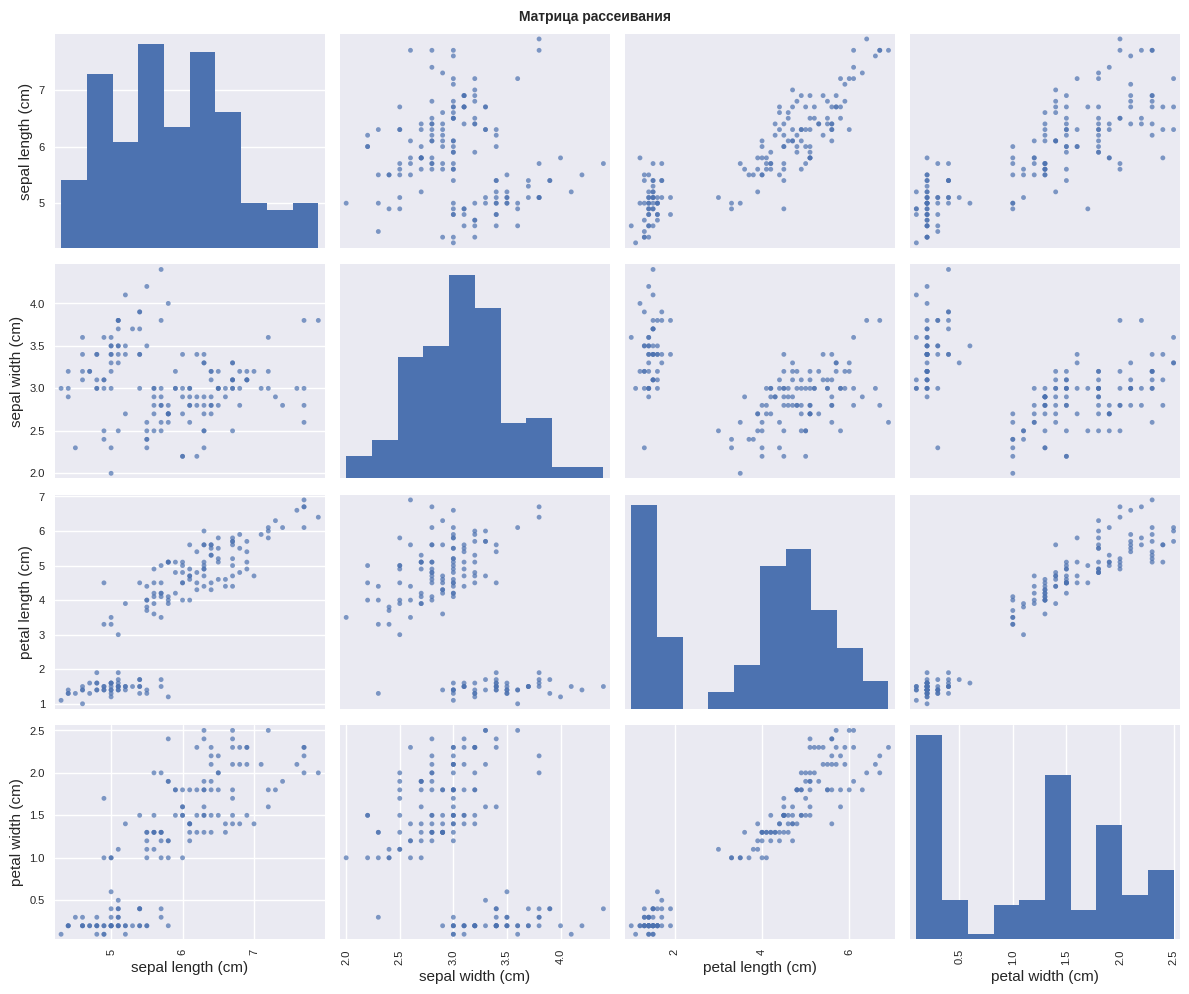

In [10]:
plt.figure(figsize = (12, 10))
pd.plotting.scatter_matrix(iris_df[numericColumns],
                          figsize=(12, 10),
                          diagonal='hist',
                          alpha=0.7,
                          grid=True)
plt.suptitle('Матрица рассеивания',
             fontsize=10, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()


**Анализ полученных результатов**

Petal length и Petal width = 0.96 -> лепестки растут пропорционально

Sepal width и Sepal length = -0.12 -> Отсутствует линейная связь, независимый механизм роста

Рассматривая разделение видов -> Setosa четко отделяется по малым размерам лепестков

Sepal length и Petal length = 0.87;
Sepal length и Petal width: = 0.82 -> Сильная положительная корреляция указывает на согласованный рост всех частей цветка (большие чашелистики = большие лепестки)

**Цель работы №2** - познакомиться с методом кластеризации K-mean с помощью пакета sklearn.

**Ход работы №2**

**Добавление нового атрибута** - соотношение длины лепестка к ширине

In [12]:
iris_df['petal_ratio'] = iris_df['petal length (cm)'] / iris_df['petal width (cm)']

**"Причесывание датасета"**

In [13]:
iris_df = iris_df.drop_duplicates()

Q1 = iris_df[numericColumns].quantile(0.25)
Q3 = iris_df[numericColumns].quantile(0.75)
IQR = Q3 - Q1
iris_df_cleaned = iris_df[~((iris_df[numericColumns] < (Q1 - 1.5 * IQR)) | (iris_df[numericColumns] > (Q3 + 1.5 * IQR))).any(axis=1)]

**Построение графика зависимости одной переменной от другой (plt.scatter). Поиск кластеров**

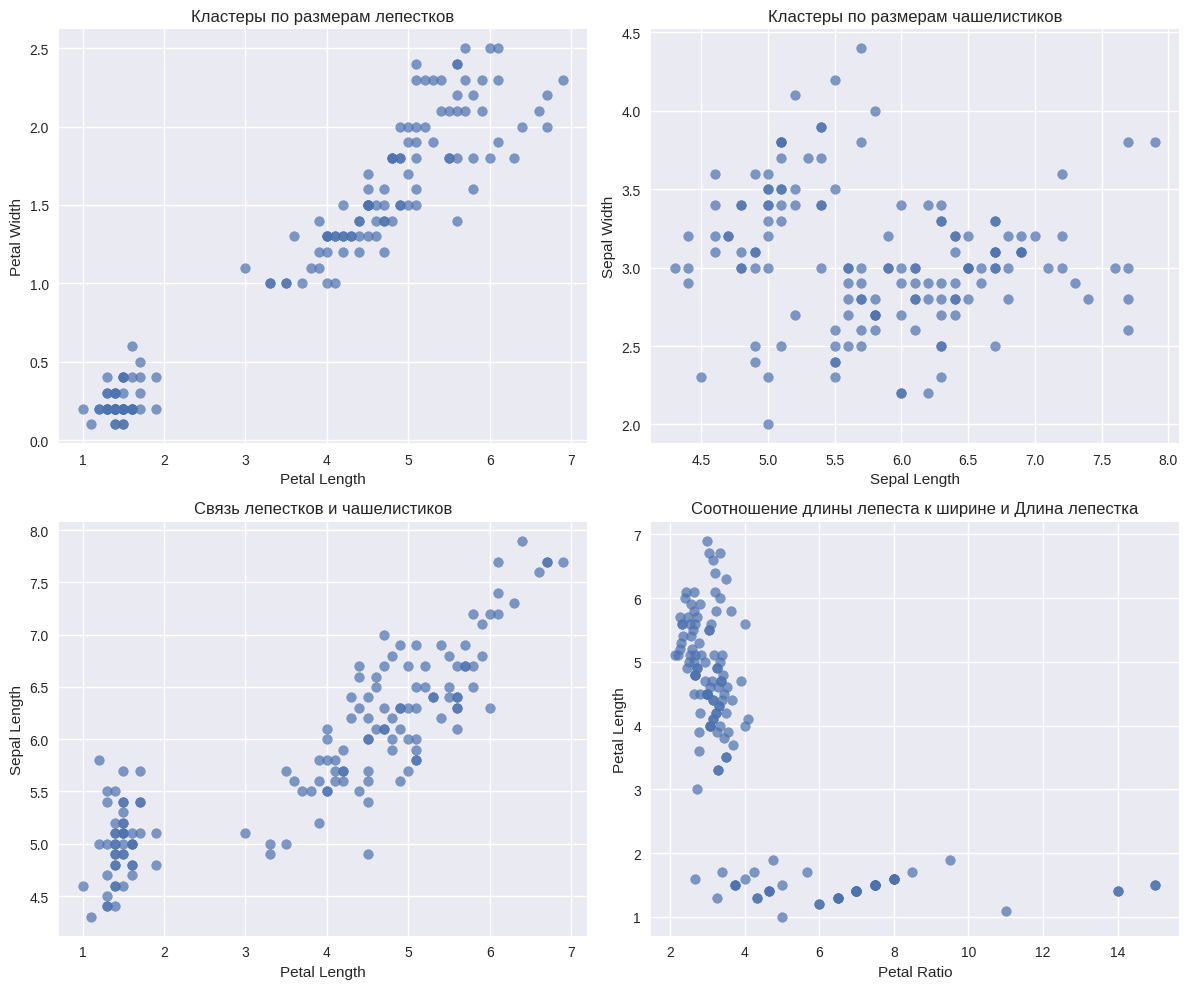

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0,0].scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], alpha=0.7)
axes[0,0].set_xlabel('Petal Length')
axes[0,0].set_ylabel('Petal Width')
axes[0,0].set_title('Кластеры по размерам лепестков')

axes[0,1].scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], alpha=0.7)
axes[0,1].set_xlabel('Sepal Length')
axes[0,1].set_ylabel('Sepal Width')
axes[0,1].set_title('Кластеры по размерам чашелистиков')

axes[1,0].scatter(iris_df['petal length (cm)'], iris_df['sepal length (cm)'], alpha=0.7)
axes[1,0].set_xlabel('Petal Length')
axes[1,0].set_ylabel('Sepal Length')
axes[1,0].set_title('Связь лепестков и чашелистиков')

if 'petal_ratio' in iris_df.columns:
    axes[1,1].scatter(iris_df['petal_ratio'], iris_df['petal length (cm)'], alpha=0.7)
    axes[1,1].set_xlabel('Petal Ratio')
    axes[1,1].set_ylabel('Petal Length')
    axes[1,1].set_title('Соотношение длины лепеста к ширине и Длина лепестка')

plt.tight_layout()
plt.show()

у Petal length и Petal width самая максимальная разделимость. Перекрытие между кластерами минимальное

**Применение метода KMeans**

/tmp/ipython-input-2191408178.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_df['cluster'] = clusters
/tmp/ipython-input-2191408178.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_df['species_numeric'] = iris_df['species'].map(species_mapping)


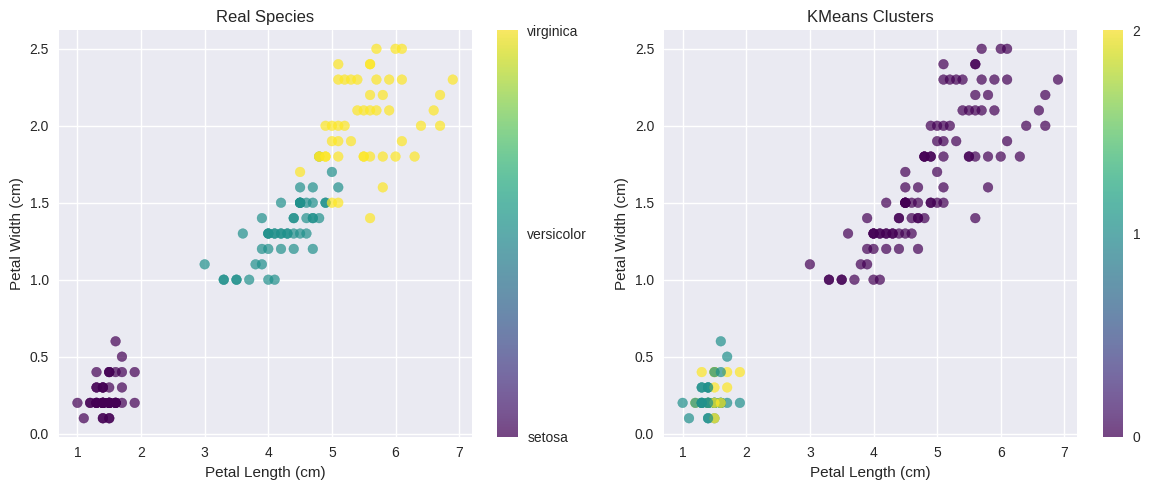

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

numericColumns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = iris_df[numericColumns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

iris_df['cluster'] = clusters

species_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
iris_df['species_numeric'] = iris_df['species'].map(species_mapping)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter1 = plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], c=iris_df['species_numeric'], cmap='viridis', alpha=0.7)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Real Species')
plt.colorbar(scatter1, ticks=[0, 1, 2]).set_ticklabels(['setosa', 'versicolor', 'virginica'])

plt.subplot(1, 2, 2)
scatter2 = plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], c=iris_df['cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('KMeans Clusters')
plt.colorbar(scatter2, ticks=[0, 1, 2])

plt.tight_layout()
plt.show()

**Оценка качества кластеризации**

In [20]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

centroids = kmeans.cluster_centers_
print("Центроиды кластеров:")
print(pd.DataFrame(scaler.inverse_transform(centroids), columns=numericColumns))

Silhouette Score: 0.494
Центроиды кластеров:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           6.266667          2.873737           4.904040          1.673737
1           4.878378          3.259459           1.440541          0.232432
2           5.369231          3.907692           1.523077          0.284615


**Анализ полученных результатов**

Новый признак улучшает разделимость кластеров. Исходный датасет имеет меньше выбросов и избавился от пропусков. Дубликаты отсутствуют. Наилучшее разделение имеют petal length и petal width. Результаты близки к реальному распределению по видам. Имеется хорошее качество кластеризации. KMeans эффективен для автоматического выделения групп ирисов